## importing library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
%matplotlib inline

## Understanding the data

In [2]:
df= pd.read_csv('ATM_transaction_dataset.csv', encoding ="ISO-8859-1")

Display the first few rows of the dataset using .head() to get an initial overview of the data.

In [3]:
df.head()

,atm_name,transaction_date,No_Of_Withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card,weekday,working_day
0,Big Street ATM,01/01/2011,50,20,30,123800,41700,82100,saturday,H
1,Mount Road ATM,01/01/2011,253,67,186,767900,270900,497000,saturday,H
2,Airport ATM,01/01/2011,98,56,42,503400,347700,155700,saturday,H
3,KK Nagar ATM,01/01/2011,265,159,106,945300,532600,412700,saturday,H
4,Christ College ATM,01/01/2011,74,25,49,287700,148200,139500,saturday,H


In [4]:
df.shape

(11589, 10)

In [5]:
df.columns

Index(['atm_name', 'transaction_date', 'No_Of_Withdrawals',
       'no_of_cub_card_withdrawals', 'no_of_other_card_withdrawals',
       'total_amount_withdrawn', 'amount_withdrawn_cub_card',
       'amount_withdrawn_other_card', 'weekday', 'working_day'],
      dtype='object')

In [6]:
df.size

115890

In [7]:
df.info

<bound method DataFrame.info of                  atm_name transaction_date  No_Of_Withdrawals  \
0          Big Street ATM       01/01/2011                 50   
1          Mount Road ATM       01/01/2011                253   
2             Airport ATM       01/01/2011                 98   
3            KK Nagar ATM       01/01/2011                265   
4      Christ College ATM       01/01/2011                 74   
...                   ...              ...                ...   
11584      Big Street ATM       29/09/2017                137   
11585      Mount Road ATM       29/09/2017                 79   
11586         Airport ATM       29/09/2017                117   
11587        KK Nagar ATM       29/09/2017                 76   
11588  Christ College ATM       29/09/2017                143   

       no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                              20                            30   
1                              67                    

In [8]:
df.describe()

,No_Of_Withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card
count,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,123.341099,67.567694,55.773406,5.223059e+05,3.345604e+05,1.877455e+05
std,67.315288,47.849517,38.506475,3.248167e+05,2.470771e+05,1.502351e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000e+00
25%,79.000000,34.000000,25.000000,3.057000e+05,1.560000e+05,7.910000e+04
50%,115.000000,57.000000,50.000000,4.700000e+05,2.816000e+05,1.586000e+05
75%,158.000000,87.000000,78.000000,6.716000e+05,4.485000e+05,2.560000e+05
max,491.000000,345.000000,310.000000,2.549800e+06,1.907800e+06,1.472600e+06


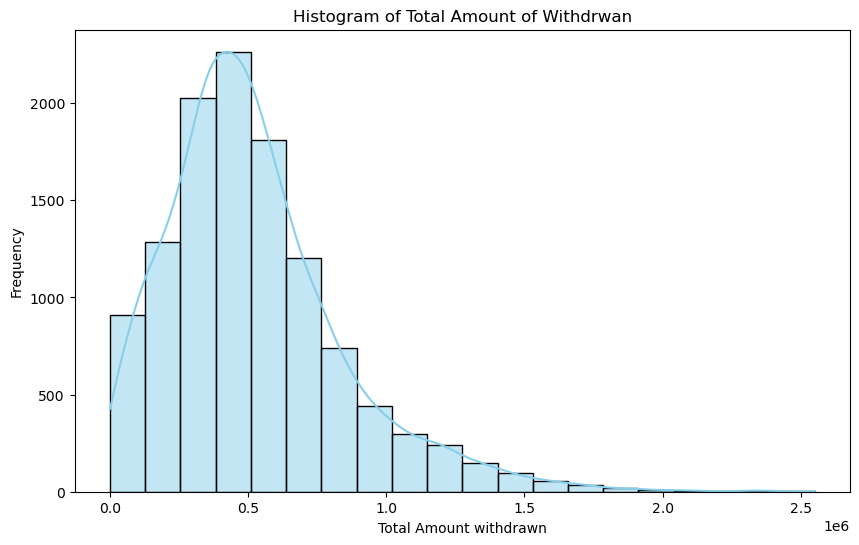

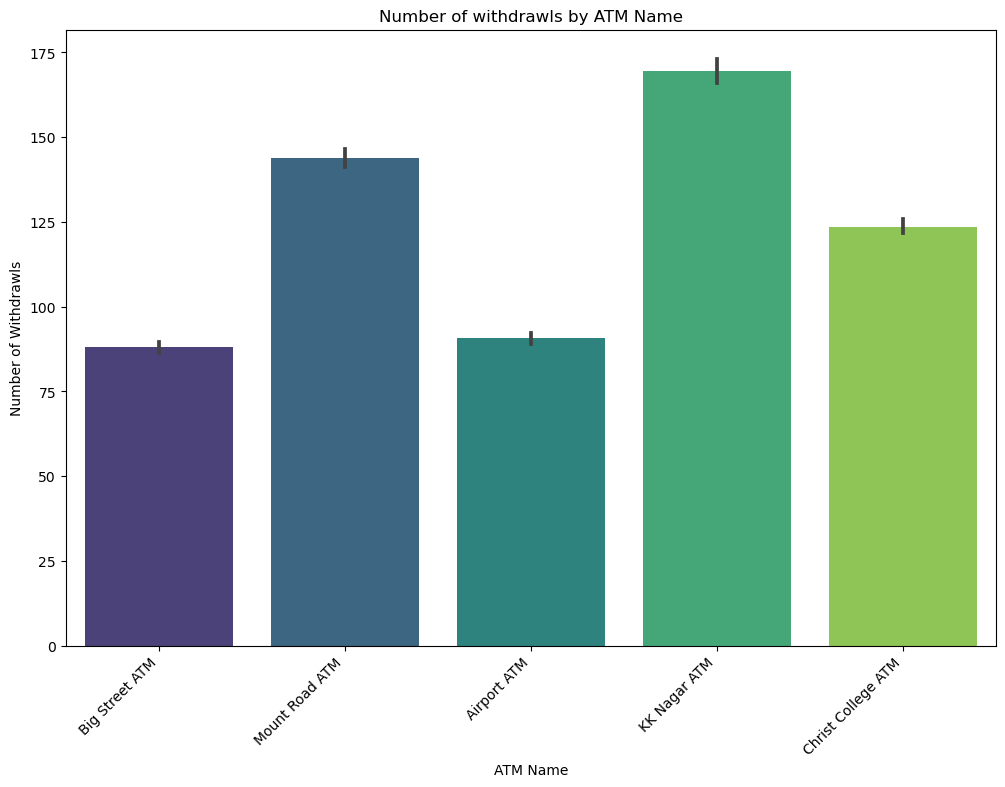

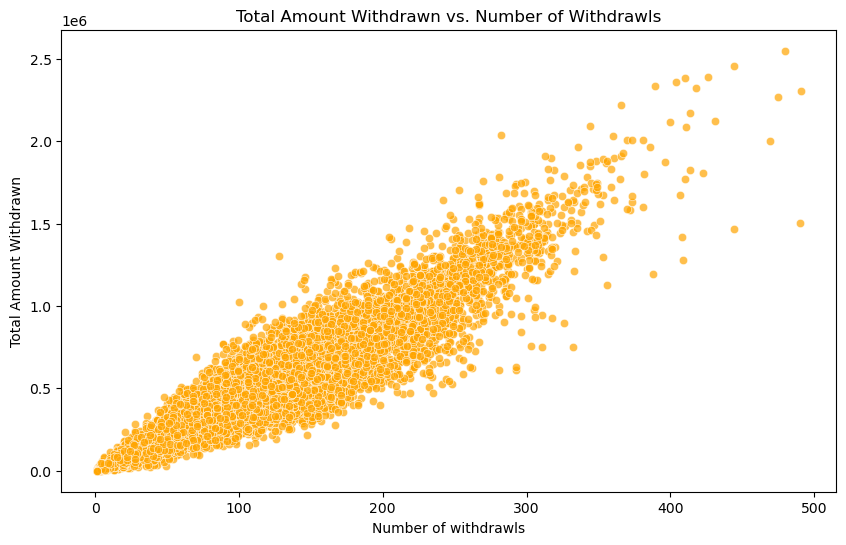

In [9]:
#histogram of total amount withdrawn
plt.figure(figsize=(10,6))
sns.histplot(df['total_amount_withdrawn'], bins=20, kde=True, color ='skyblue')
plt.title('Histogram of Total Amount of Withdrwan')
plt.xlabel('Total Amount withdrawn')
plt.ylabel('Frequency')
plt.show()

#barplot of withdrwals  by ATM name
plt.figure(figsize=(12, 8))
sns.barplot(x='atm_name', y = 'No_Of_Withdrawals', data=df, palette ='viridis')
plt.title('Number of withdrawls by ATM Name')
plt.xlabel('ATM Name')
plt.ylabel('Number of Withdrawls')
plt.xticks(rotation=45, ha = 'right')
plt.show()

#scatter plot of total amount withdrawn vs. number of withdrawls
plt.figure(figsize=(10,6))
sns.scatterplot(x='No_Of_Withdrawals', y = 'total_amount_withdrawn',data = df, color='orange',alpha=0.7)
plt.title('Total Amount Withdrawn vs. Number of Withdrawls')
plt.xlabel('Number of withdrawls')
plt.ylabel('Total Amount Withdrawn')
plt.show()

## Preprocessing
Checking the null value: we use .isnull() method

In [10]:
missing_values=df.isnull().sum()
print('Missing Values:\n',missing_values)

Missing Values:
 atm_name                        0
transaction_date                0
No_Of_Withdrawals               0
no_of_cub_card_withdrawals      0
no_of_other_card_withdrawals    0
total_amount_withdrawn          0
amount_withdrawn_cub_card       0
amount_withdrawn_other_card     0
weekday                         0
working_day                     0
dtype: int64


In [11]:
#check for duplicate
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows: \n", duplicate_rows)

#remove duplicate rows
df.drop_duplicates(inplace=True)

Duplicate Rows: 
 Empty DataFrame
Columns: [atm_name, transaction_date, No_Of_Withdrawals, no_of_cub_card_withdrawals, no_of_other_card_withdrawals, total_amount_withdrawn, amount_withdrawn_cub_card, amount_withdrawn_other_card, weekday, working_day]
Index: []


## Standardizing Columns

In [12]:
#standardize column name (optional)
df.columns=df.columns.str.lower() # convert column name to lowercase

In [13]:
#check data_types
print("Date Types:\n",df.dtypes)

#convert 'transaction_date' to datetime format
df['transaction_date']=pd.to_datetime(df['transaction_date'],dayfirst=False)
print("Date Types:\n",df.dtypes)

Date Types:
 atm_name                        object
transaction_date                object
no_of_withdrawals                int64
no_of_cub_card_withdrawals       int64
no_of_other_card_withdrawals     int64
total_amount_withdrawn           int64
amount_withdrawn_cub_card        int64
amount_withdrawn_other_card      int64
weekday                         object
working_day                     object
dtype: object
Date Types:
 atm_name                                object
transaction_date                datetime64[ns]
no_of_withdrawals                        int64
no_of_cub_card_withdrawals               int64
no_of_other_card_withdrawals             int64
total_amount_withdrawn                   int64
amount_withdrawn_cub_card                int64
amount_withdrawn_other_card              int64
weekday                                 object
working_day                             object
dtype: object


C:\Users\anush\AppData\Local\Temp\ipykernel_7928\641332731.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['transaction_date']=pd.to_datetime(df['transaction_date'],dayfirst=False)


## Checking for Outliers (Optional)
We'll examine numerical variable for outliers that may indicate data entry erroes or anomalies.


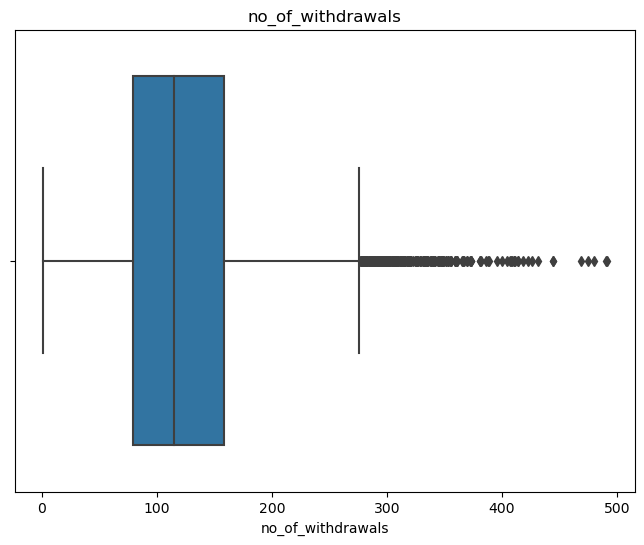

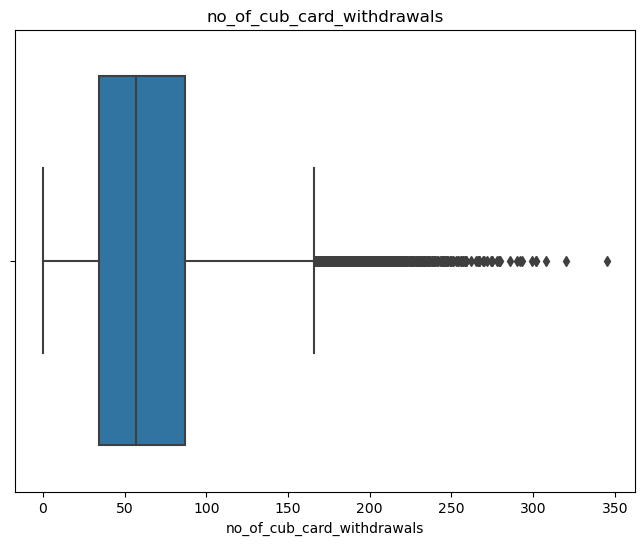

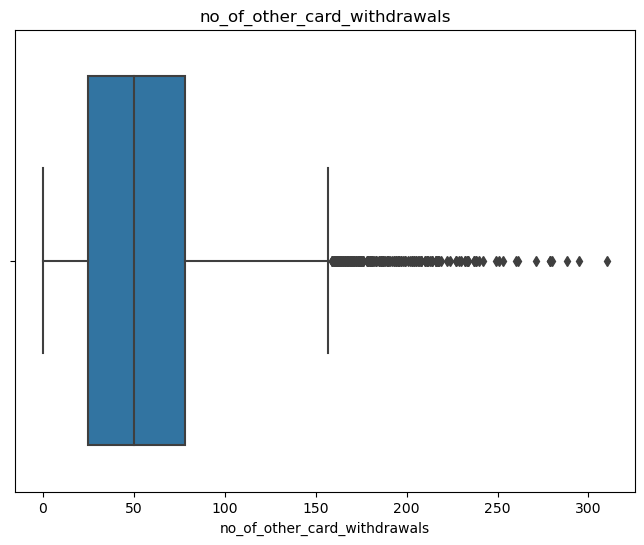

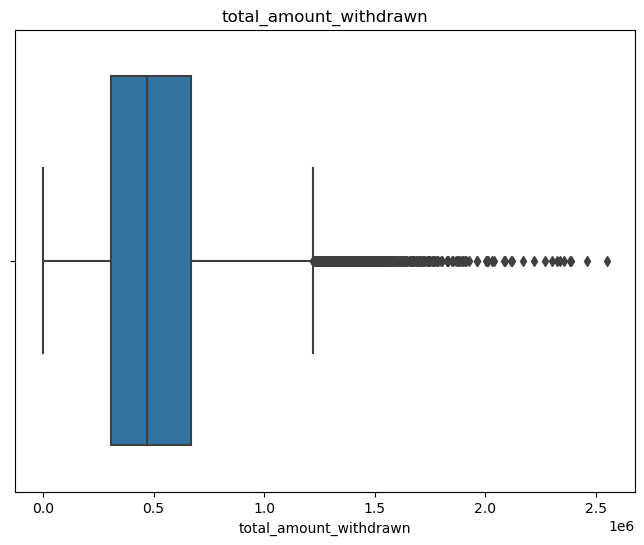

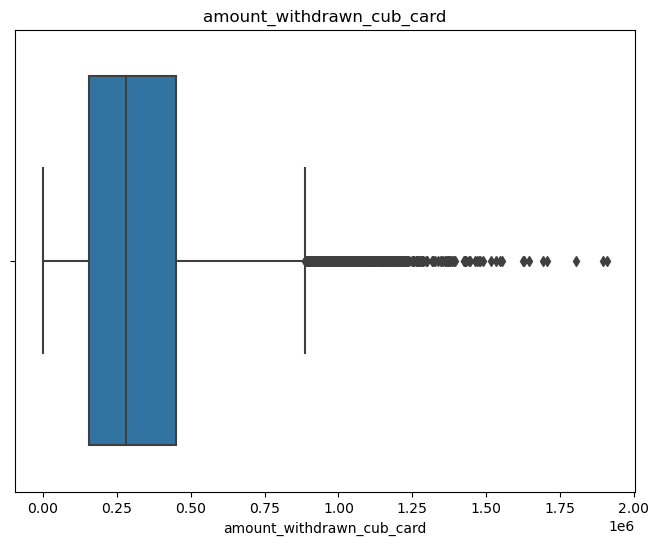

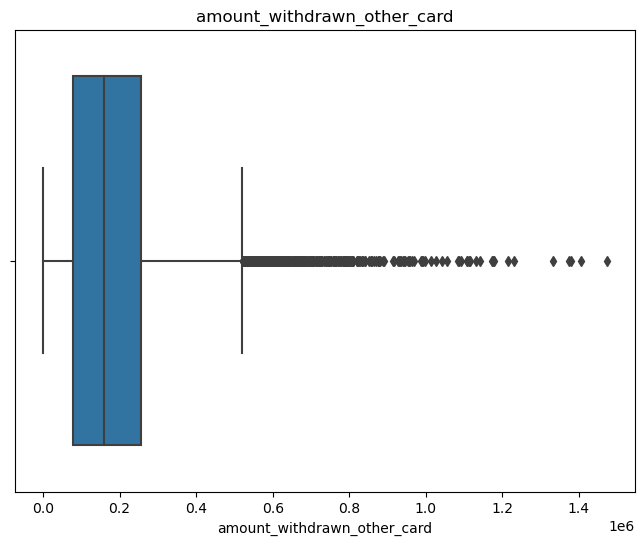

In [14]:
#check outlier in numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
    #use box plot to visualize outliers
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [15]:
#plot actual vs predicted values for training data


In [16]:
# Check unique values of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("Unique values in", col, ":", df[col].unique())

Unique values in atm_name : ['Big Street ATM' 'Mount Road ATM' 'Airport ATM' 'KK Nagar ATM'
 'Christ College ATM']
Unique values in weekday : ['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']
Unique values in working_day : ['H' 'W']


## Descriptive analysis
Compute summary statistics such as mean, median, mode, standard deviation,
    minimum, and maximum values for numerical columns.

Summary Statistics:
        no_of_withdrawals  no_of_cub_card_withdrawals  \
count       11589.000000                11589.000000   
mean          123.341099                   67.567694   
std            67.315288                   47.849517   
min             1.000000                    0.000000   
25%            79.000000                   34.000000   
50%           115.000000                   57.000000   
75%           158.000000                   87.000000   
max           491.000000                  345.000000   

       no_of_other_card_withdrawals  total_amount_withdrawn  \
count                  11589.000000            1.158900e+04   
mean                      55.773406            5.223059e+05   
std                       38.506475            3.248167e+05   
min                        0.000000            1.000000e+02   
25%                       25.000000            3.057000e+05   
50%                       50.000000            4.700000e+05   
75%                       78.0000

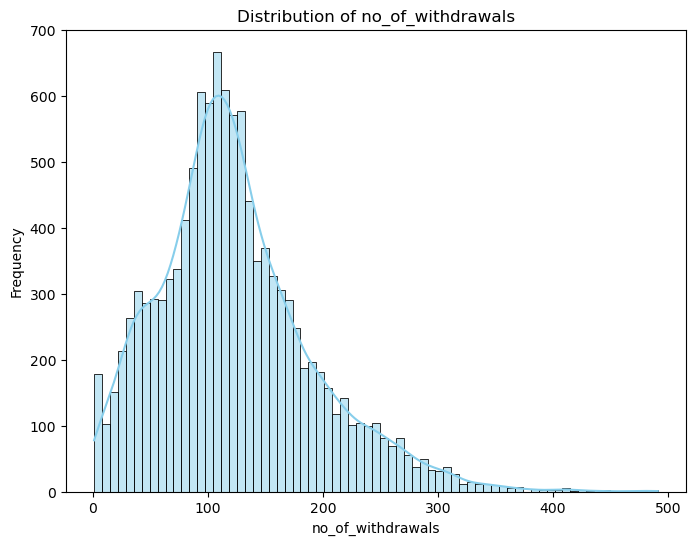

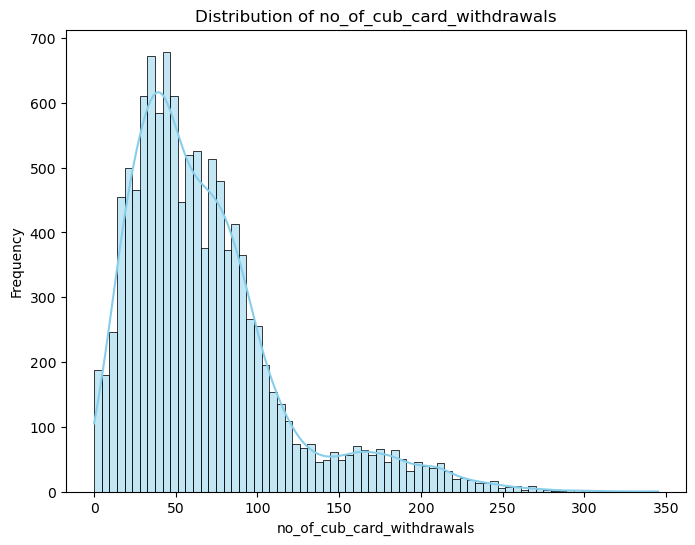

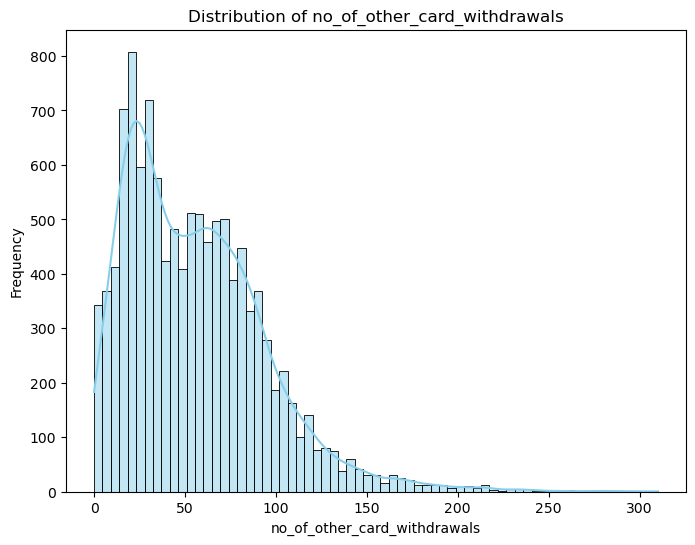

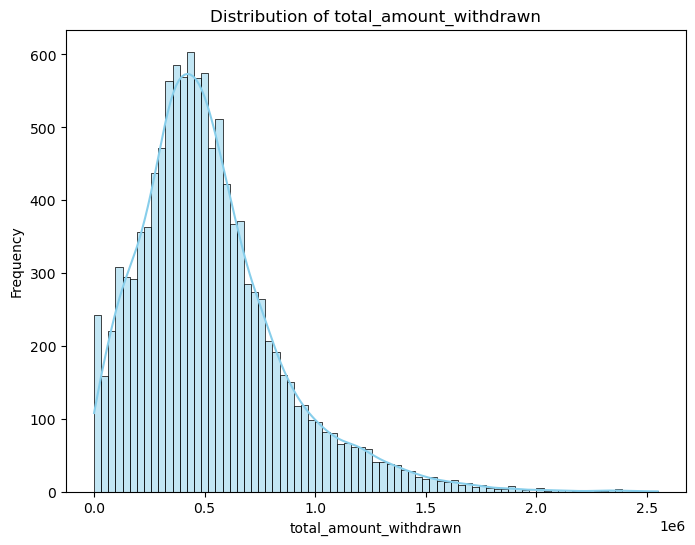

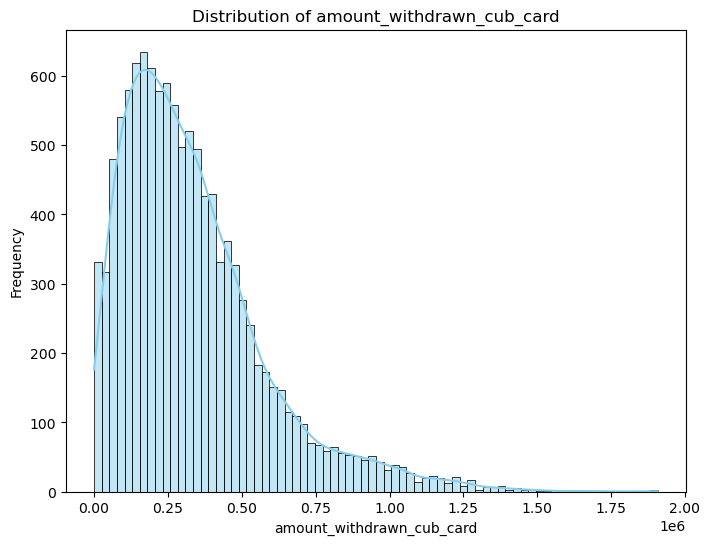

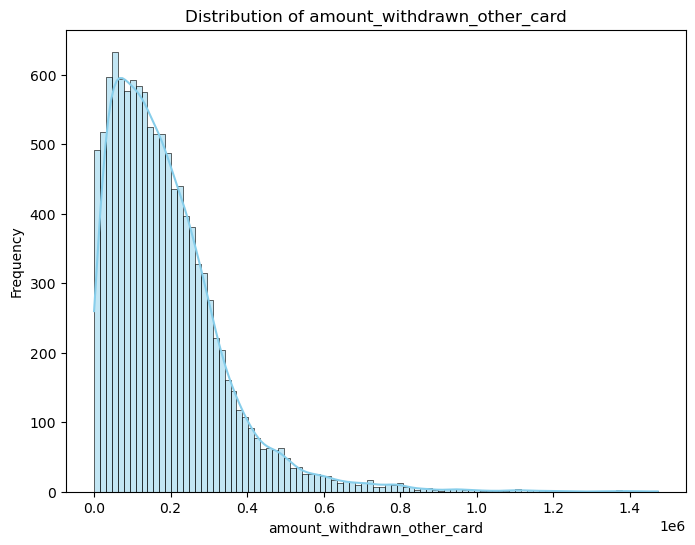

In [17]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Data distribution (histograms and density plots)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Next, we can analyze categorical variables and 
examine the relationships between numerical variables using correlation analysis:

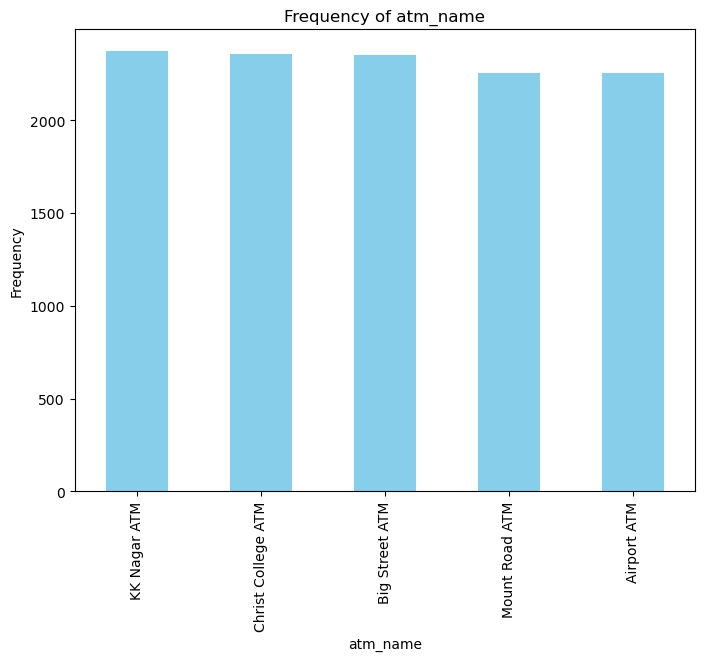

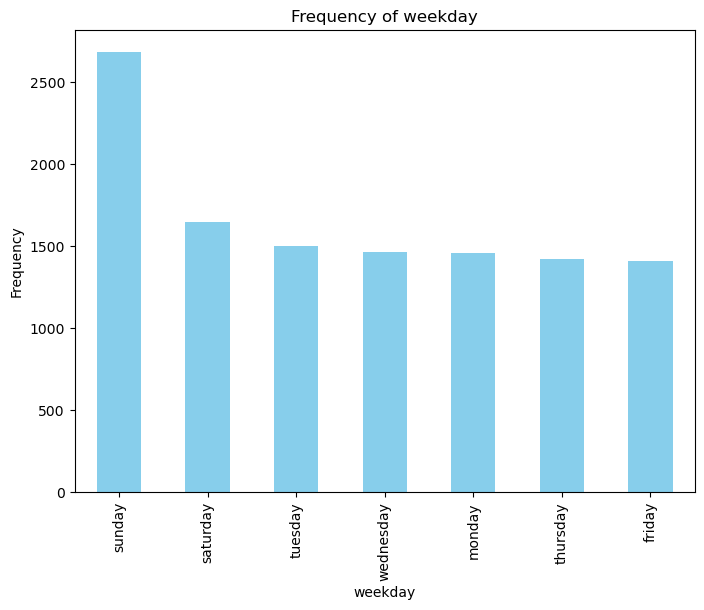

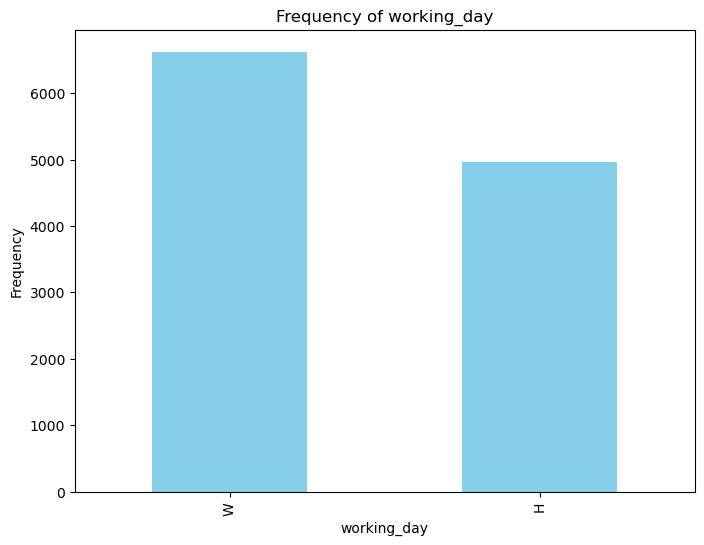

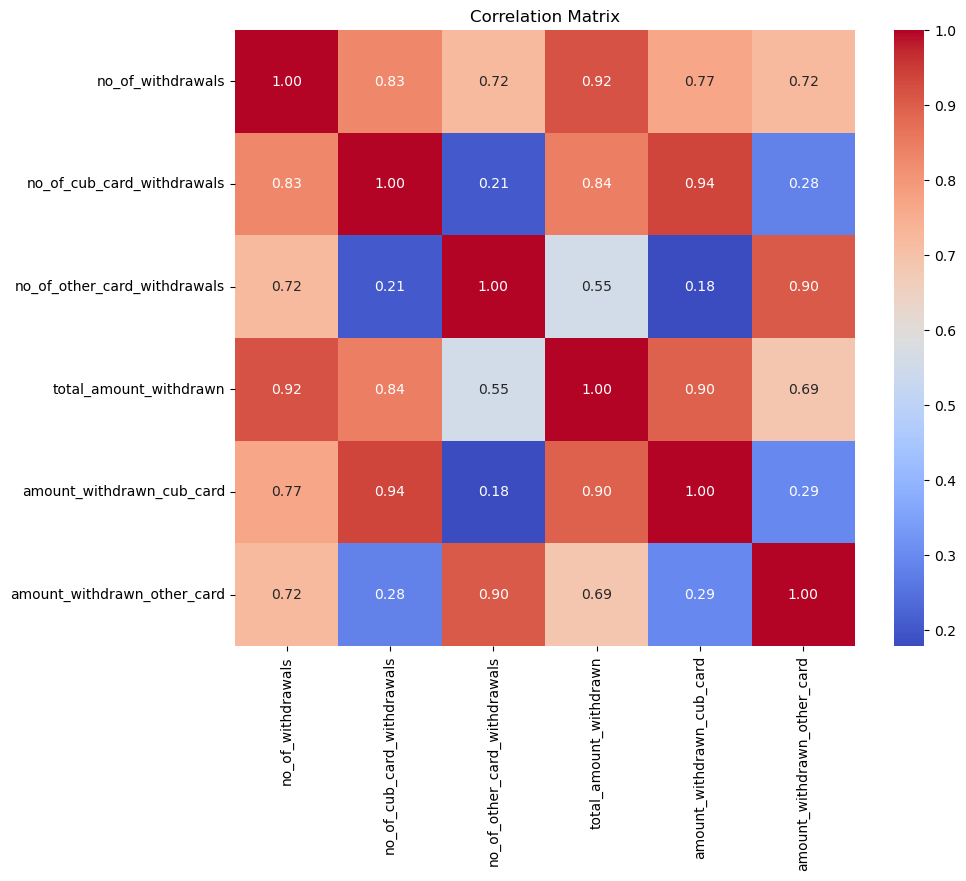

In [18]:
# Categorical analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Frequency of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation analysis
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

These analyses will provide insights into the central tendencies, variability, and 
distributions of numerical variables, as well as the frequency distributions of 
categorical variables. Additionally, the correlation analysis will help identify 
relationships between numerical variables.


## Exploratory Data Analyis(EDA)
Exploratory Data Analysis (EDA) involves visualizing and understanding the 
relationships between variables in the dataset. It helps in uncovering patterns,
trends, and anomalies that can guide further analysis or modeling decisions. 

Here's how we can perform EDA for the provided dataset:

    Univariate Analysis: Analyze individual variables to understand their distributions and characteristics. EX: box plot

    Bivariate Analysis: Explore relationships between pairs of variables to identify potential correlations or associations. Ex: bar, scatter, histogram

    Multivariate Analysis: Investigate interactions between multiple variables to gain deeper insights into the data.. EX: heatmap

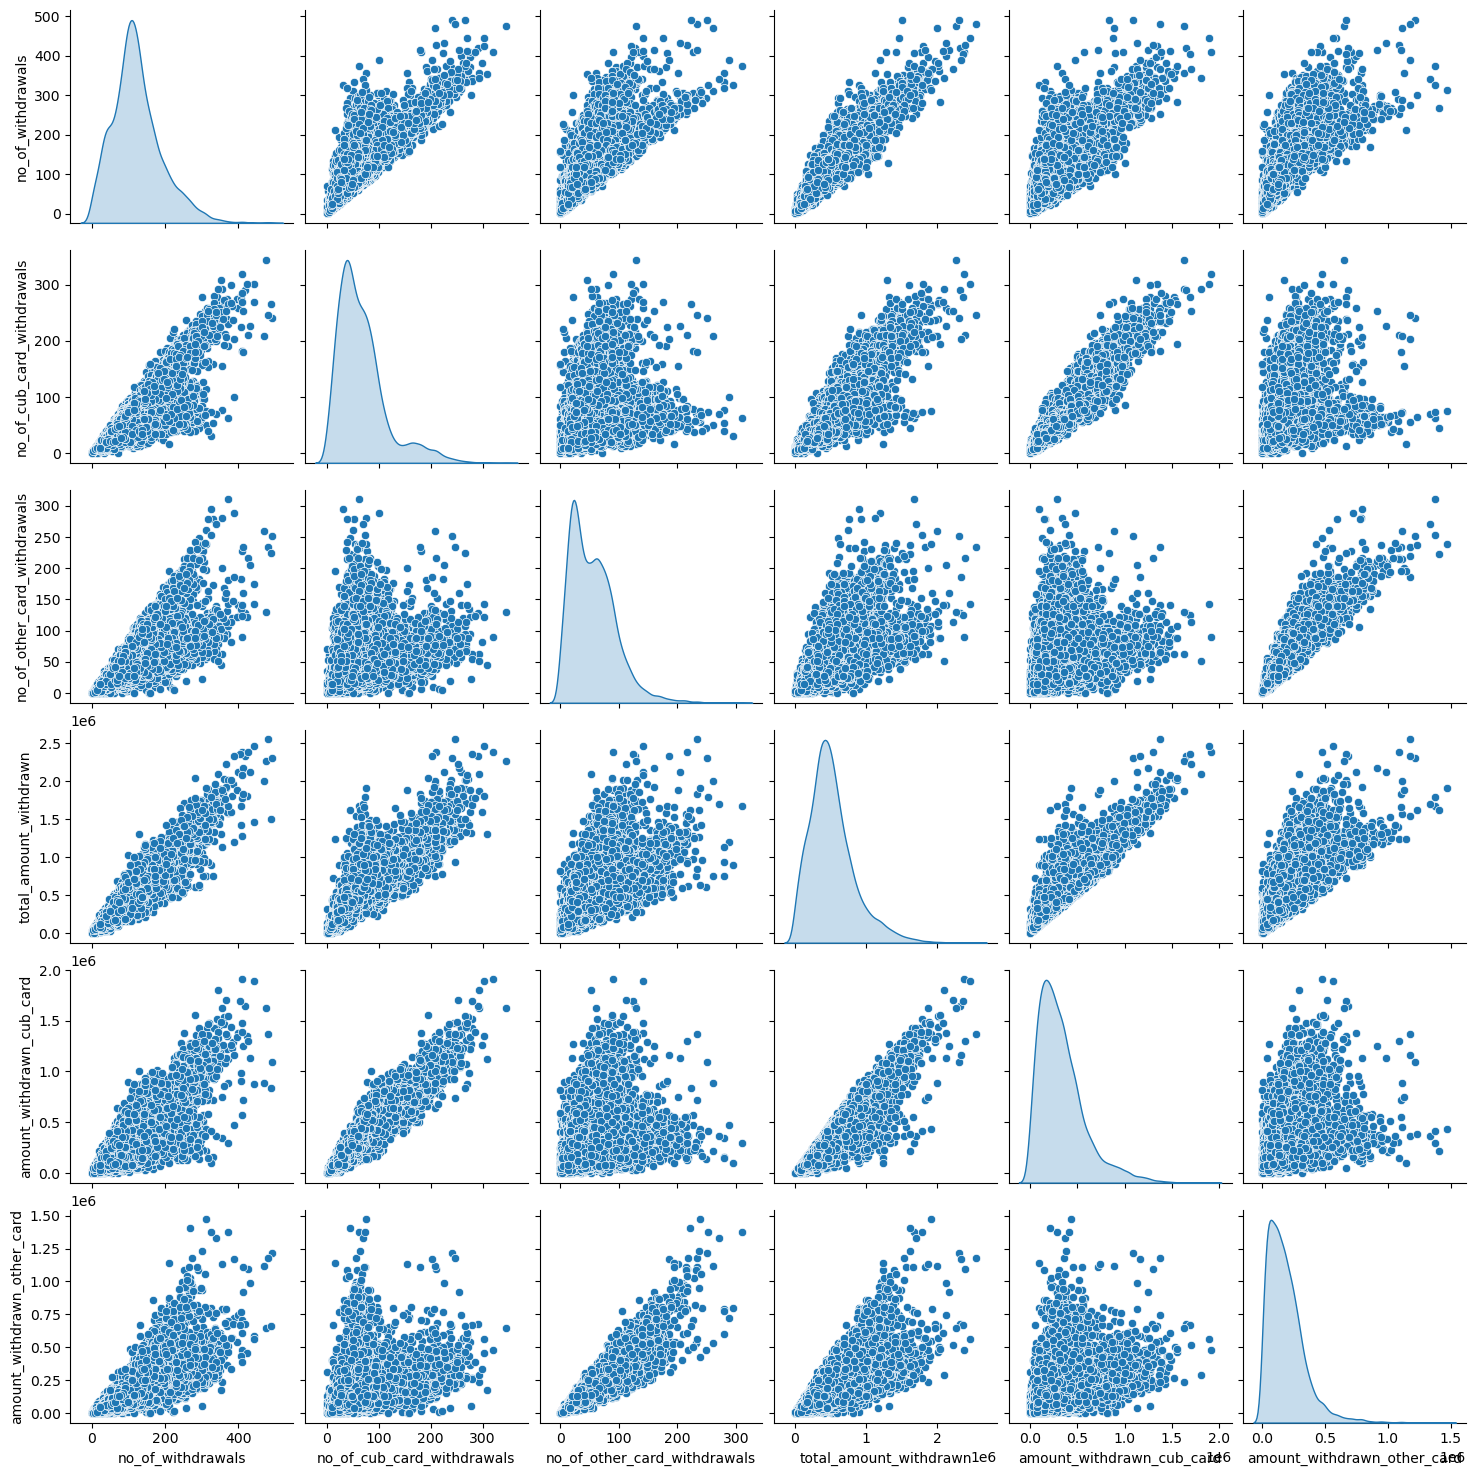

In [19]:
#scatter plots for relationships between numerical variables
sns.pairplot(df[numerical_cols],diag_kind='kde')
plt.show()

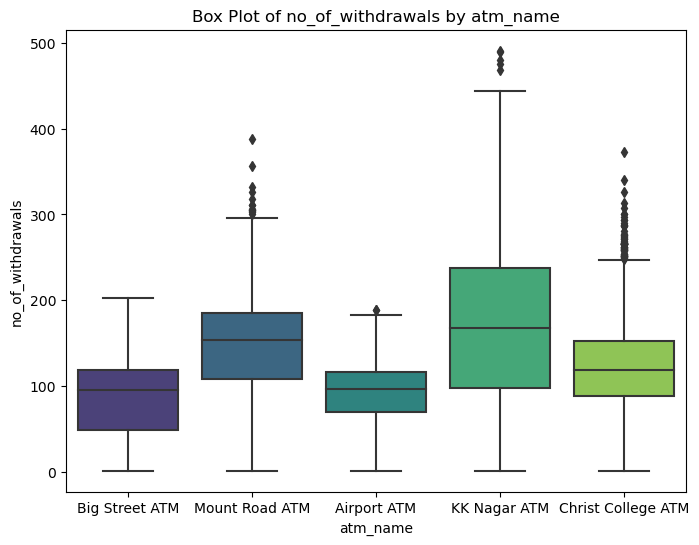

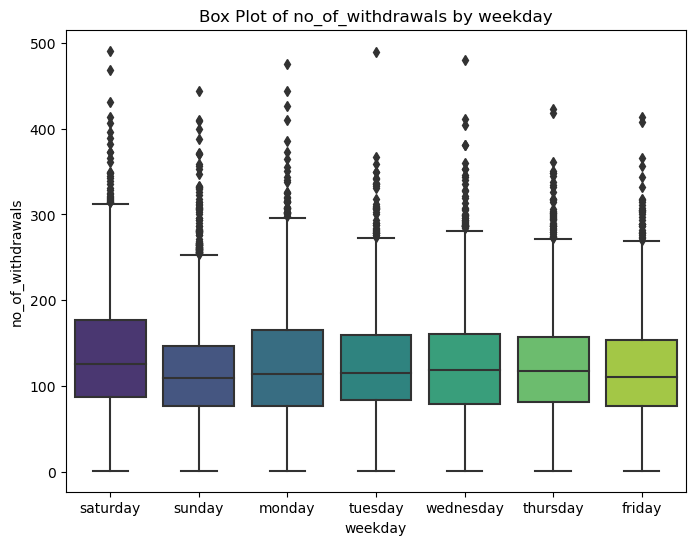

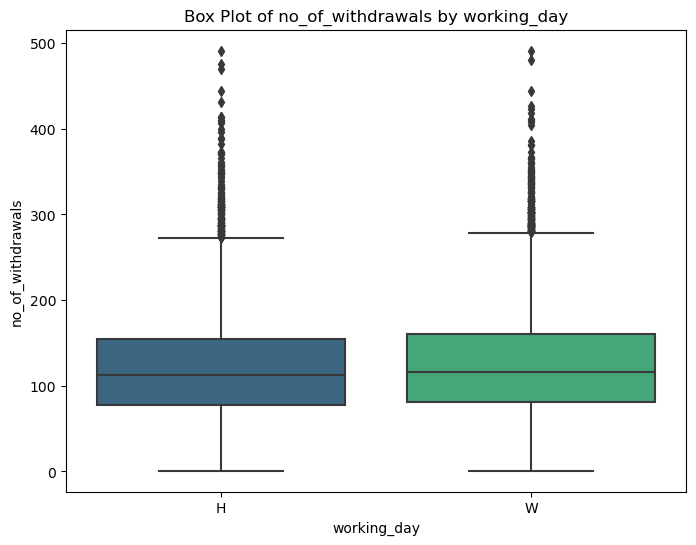

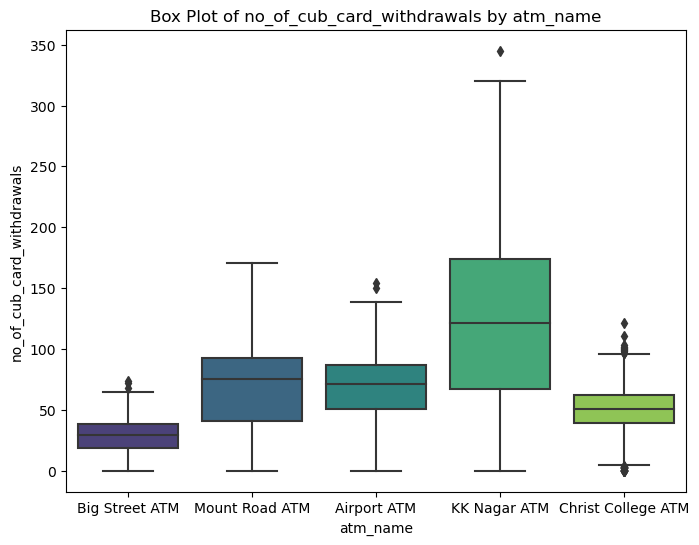

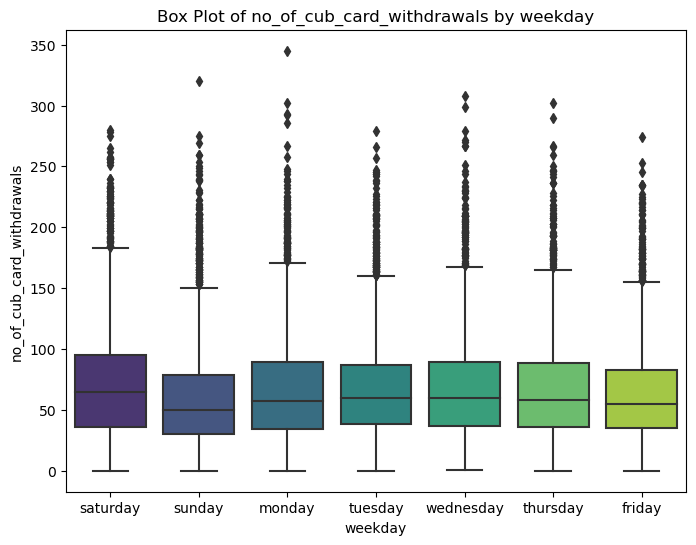

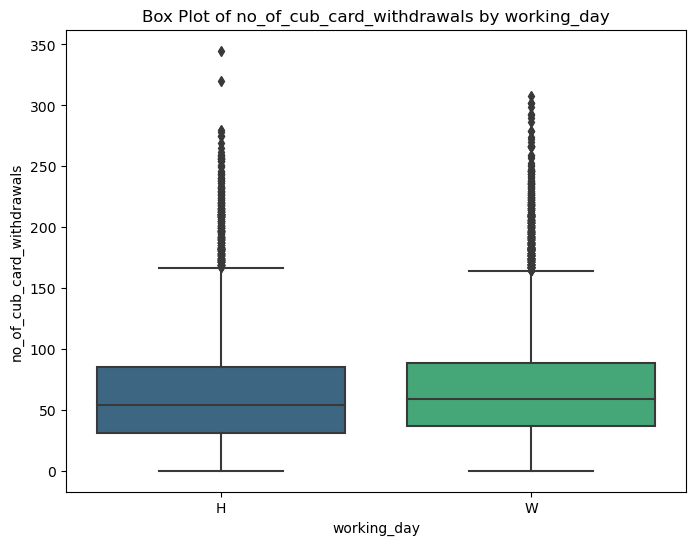

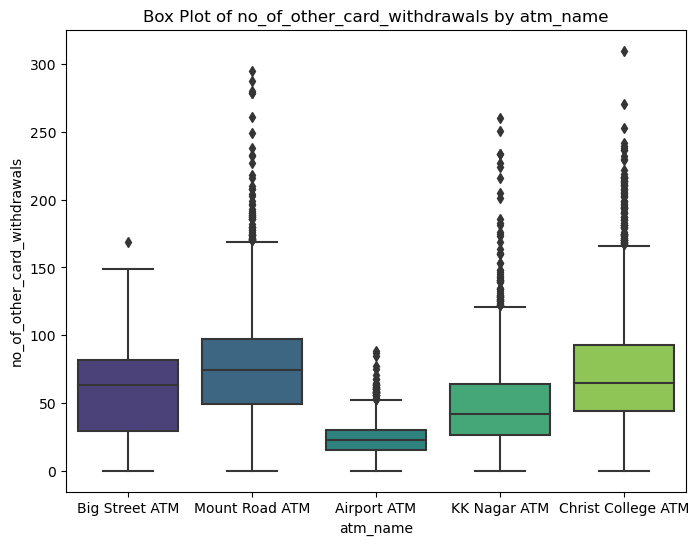

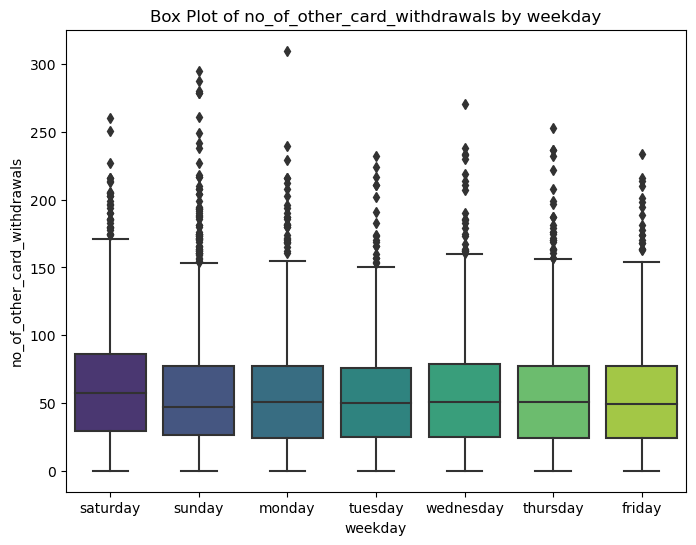

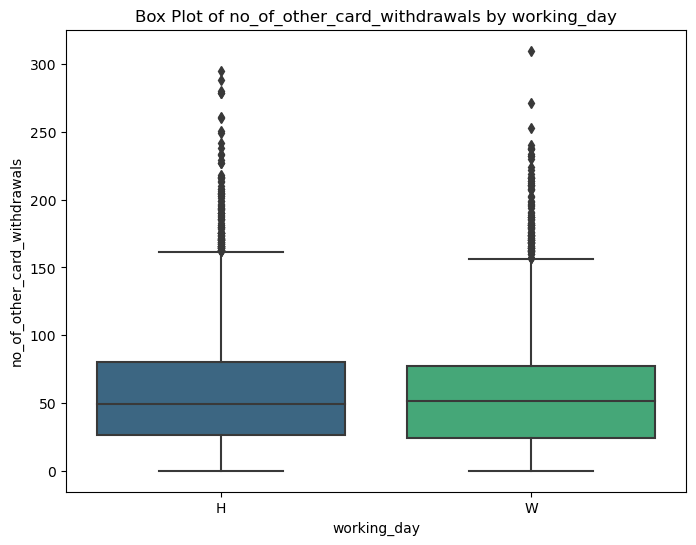

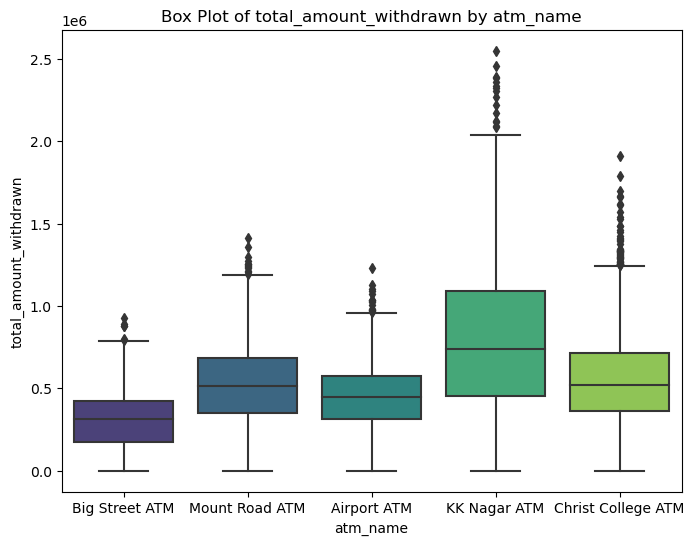

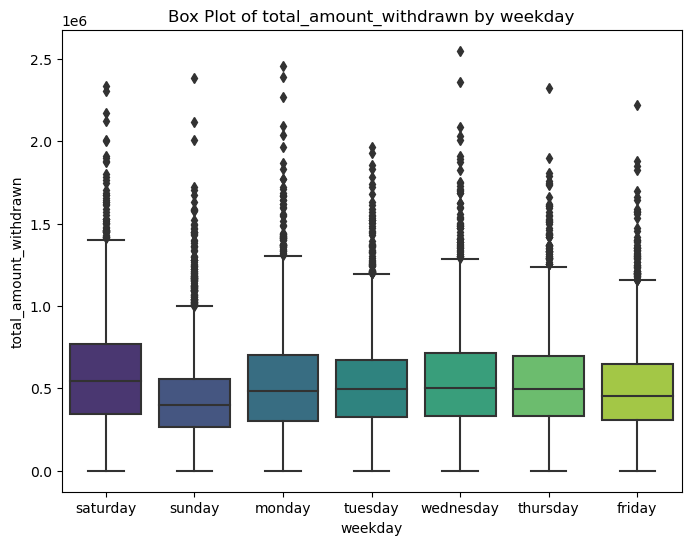

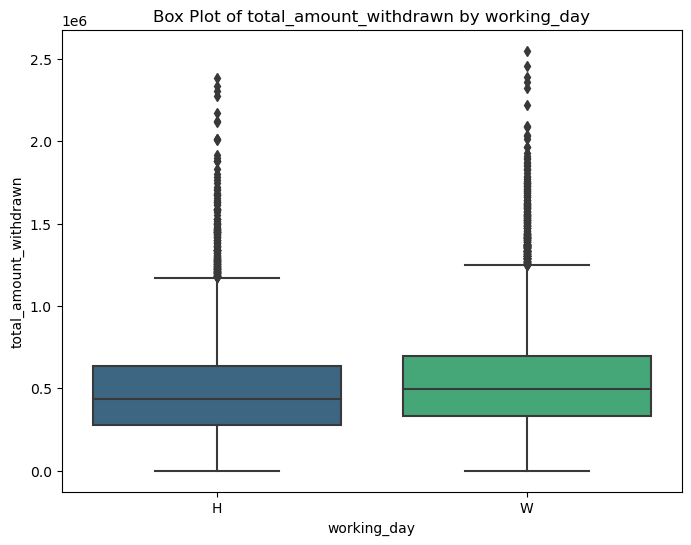

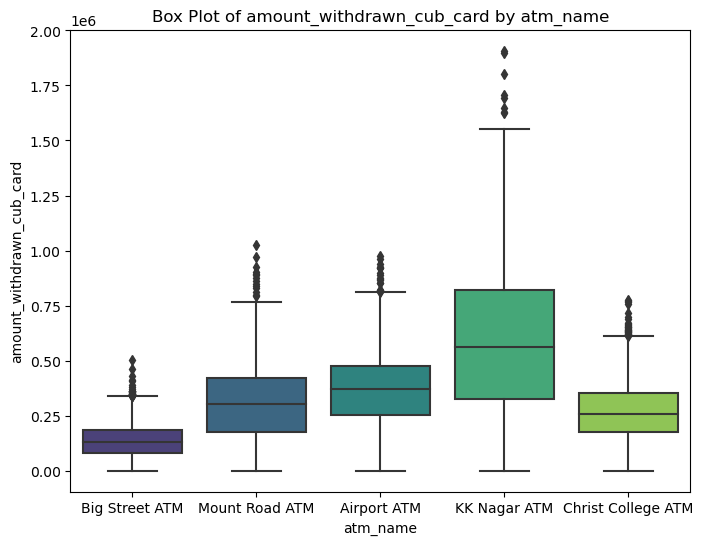

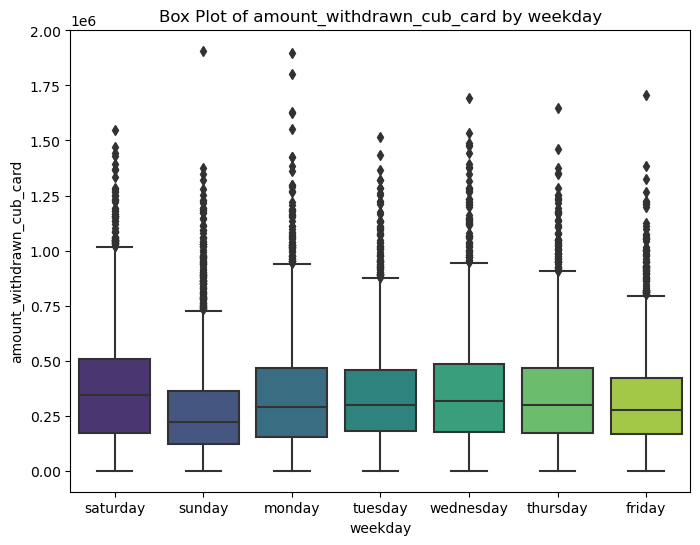

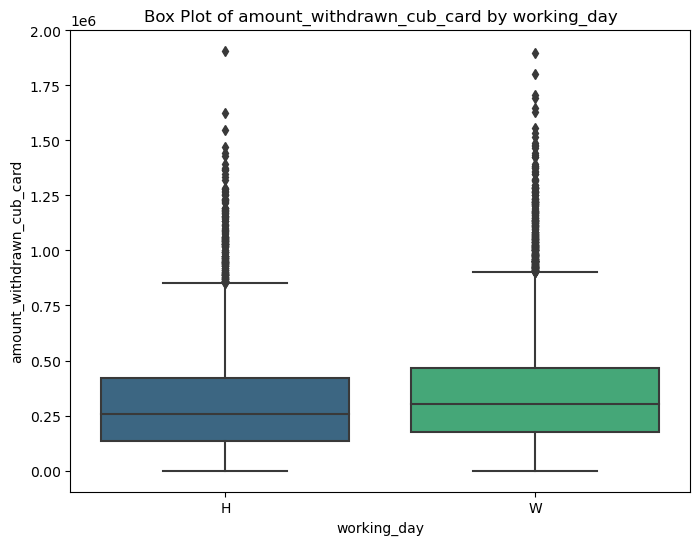

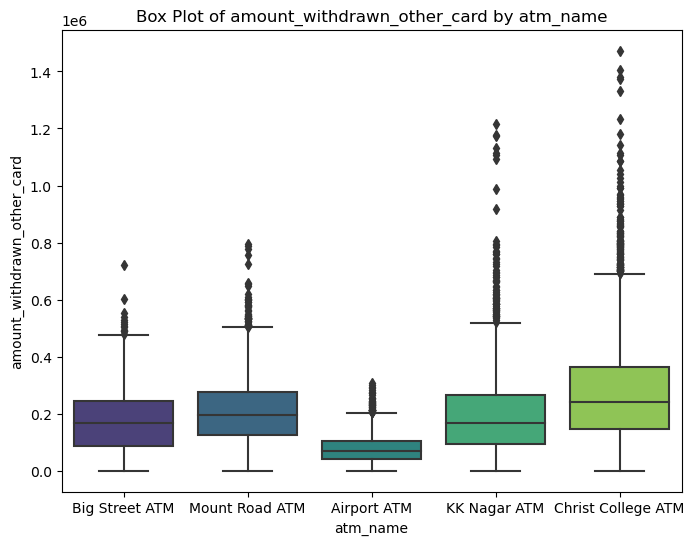

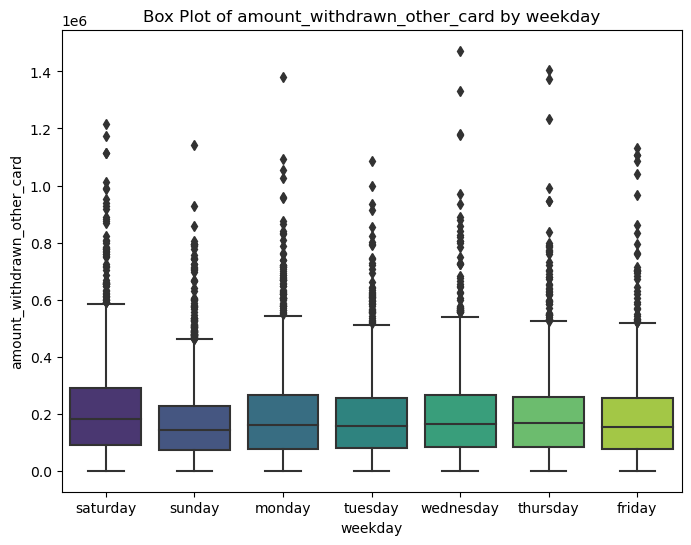

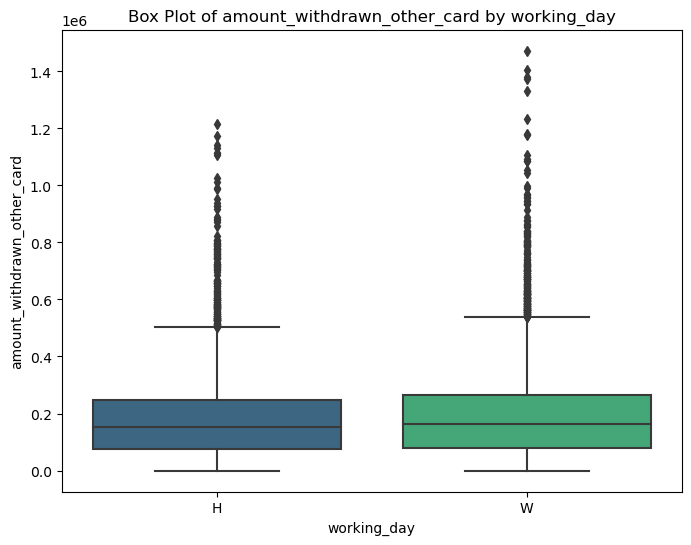

In [20]:
#box plots for relationships between numerical and categorical variable
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=cat_col, y = num_col, data=df, palette='viridis')
        plt.title('Box Plot of ' + num_col + ' by '+cat_col)
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show

## Feature Engineering
Creating New Feature: We will start with new feature based on existing ones. It is about which feature we focus on. Let's take total number of withdraw made using card.

In [21]:
#create a new feature representing the total number of card withdrawls
df['total card_withdrawals']=df['no_of_cub_card_withdrawals']+df['no_of_other_card_withdrawals']

#print the first few row with added feature
print(df.head())

             atm_name transaction_date  no_of_withdrawals  \
0      Big Street ATM       2011-01-01                 50   
1      Mount Road ATM       2011-01-01                253   
2         Airport ATM       2011-01-01                 98   
3        KK Nagar ATM       2011-01-01                265   
4  Christ College ATM       2011-01-01                 74   

   no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                          20                            30   
1                          67                           186   
2                          56                            42   
3                         159                           106   
4                          25                            49   

   total_amount_withdrawn  amount_withdrawn_cub_card  \
0                  123800                      41700   
1                  767900                     270900   
2                  503400                     347700   
3                  945300     

### Encoding Categorical Variable(if any):
If the data contains categorical variable like occupation, gender, working day, we change that to numerical form using encoding.


In [22]:
#perform one-hot encoding for categorical variables(if necessary)
#Replace 'categorical_cols' with actual list of categorical columns in your datasets
categorical_cols=['weekday','working_day']
df= pd.get_dummies(df, columns = categorical_cols, drop_first = True)

#Display the first few rows to verify the encoding
print(df.head())

             atm_name transaction_date  no_of_withdrawals  \
0      Big Street ATM       2011-01-01                 50   
1      Mount Road ATM       2011-01-01                253   
2         Airport ATM       2011-01-01                 98   
3        KK Nagar ATM       2011-01-01                265   
4  Christ College ATM       2011-01-01                 74   

   no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                          20                            30   
1                          67                           186   
2                          56                            42   
3                         159                           106   
4                          25                            49   

   total_amount_withdrawn  amount_withdrawn_cub_card  \
0                  123800                      41700   
1                  767900                     270900   
2                  503400                     347700   
3                  945300     

In [23]:
df.columns

Index(['atm_name', 'transaction_date', 'no_of_withdrawals',
       'no_of_cub_card_withdrawals', 'no_of_other_card_withdrawals',
       'total_amount_withdrawn', 'amount_withdrawn_cub_card',
       'amount_withdrawn_other_card', 'total card_withdrawals',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'working_day_W'],
      dtype='object')

In [24]:
# Perform one-hot encoding for categorical variables (if necessary)
# Replace 'categorical_cols' with the actual list of categorical columns in your dataset
categorical_cols = ['weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday', 'working_day_W']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows to verify the encoding
print(df.head(2))

         atm_name transaction_date  no_of_withdrawals  \
0  Big Street ATM       2011-01-01                 50   
1  Mount Road ATM       2011-01-01                253   

   no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                          20                            30   
1                          67                           186   

   total_amount_withdrawn  amount_withdrawn_cub_card  \
0                  123800                      41700   
1                  767900                     270900   

   amount_withdrawn_other_card  total card_withdrawals  weekday_monday_1  \
0                        82100                      50                 0   
1                       497000                     253                 0   

   weekday_saturday_1  weekday_sunday_1  weekday_thursday_1  \
0                   1                 0                   0   
1                   1                 0                   0   

   weekday_tuesday_1  weekday_wednesday_1  working

### Handling Datetime
If the dataset inculde dat-time variable, we'll extract relevant information such as year, month, or day from them.

In [26]:
#Extract month and day from the 'transaction_data' column
df['transaction_month']= pd.to_datetime(df['transaction_date']).dt.month
df['transaction_day']= pd.to_datetime(df['transaction_date']).dt.day

#drop the original 'transaction_date'column
df.drop('transaction_date', axis =1, inplace = True)

#display the first few rows to verify the extraction
display(df.head())

,atm_name,no_of_withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card,total card_withdrawals,weekday_monday_1,weekday_saturday_1,weekday_sunday_1,weekday_thursday_1,weekday_tuesday_1,weekday_wednesday_1,working_day_W_1,transaction_month,transaction_day
0,Big Street ATM,50,20,30,123800,41700,82100,50,0,1,0,0,0,0,0,1,1
1,Mount Road ATM,253,67,186,767900,270900,497000,253,0,1,0,0,0,0,0,1,1
2,Airport ATM,98,56,42,503400,347700,155700,98,0,1,0,0,0,0,0,1,1
3,KK Nagar ATM,265,159,106,945300,532600,412700,265,0,1,0,0,0,0,0,1,1
4,Christ College ATM,74,25,49,287700,148200,139500,74,0,1,0,0,0,0,0,1,1
